<a href="https://colab.research.google.com/github/wwwh0225/elements-of-statistical-learning/blob/main/Ch5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Piecewise Polynomials and Splines

我們在此先假設 $X$ 是一維向量( $p=1$ )，所謂 piecewise polynomial model 就是將 $X$ 的定義域(domain)切成多個連續的區間(intervals)。

![](https://esl.hohoweiya.xyz//img/05/fig5.1.png)

在圖 5.1 的左上圖，展示 piecewise constant model，我們將 $X$ 分成三段，也就是要建立兩個 knots $(\xi_1,\xi_2)$ ，也會建立**三**個 basis functions: 
$$h_1(X)=I(X < \xi_1),\ h_2(X)=I(\xi_1 \leq X < \xi_2),\ h_3(X)=I(\xi_2 \leq X)$$

所以 $f(X)$ 可以表示成 $f(X)=\sum_{m=1}^3\beta_m h_m(X)$ ，而對第 $m$ 個區域的估計 $\beta_m$ 為 $\hat{\beta_m}=\bar{Y_m}$ 。

$$\hat{\beta}=\mathop{\arg\min}\limits_{\beta}(\int_{\xi_L}^{\xi_1}(f(X)-\beta_1)^2dX + \int_{\xi_1}^{\xi_2}f(X)-\beta_2)^2dX + \int_{\xi_2}^{\xi_U}f(X)-\beta_2)^2dX)$$

而右上角的圖為 piecewise linear model，也就是在上一個常數模型之下， 再增加一個 $X$ 項，所以會再多三項 $h_{m+3}=h_m(X)X,\ m=1,2,3$ 。

除了一些特殊情形，我們會希望所作出的圖如左下圖所示，為分段線性，但是在 knots 處是連續的( $f(\xi_1^-)=f(\xi_1^+)$ )。回到剛剛所建構的 piecewise linear model，也就是 $\beta_1 + \xi_1\beta_4 = \beta_2 + \xi_1\beta_5$ 和 $\beta_2 + \xi_2\beta_5 = \beta_3 + \xi_2\beta_6$ ，由於有兩個 knots ，故參數相較上一個模型可以減少2個，我們可以將基底函數表示成：

$$h_1(X)=1,\ h_2(X)=X ,\ h_3(X)=(X-\xi_1)_+,\ h_4(X)=(X-\xi_2)_+$$

![](https://esl.hohoweiya.xyz//img/05/fig5.2.png)

在討論完線性的情況後，圖 5.2 展現了非線性的多項式配適的結果，並展現了不連續、連續、在一階微分連續、在二階微分連續等結果。

在限制函數一階和二階可微分的情況之下，我們至少需要一個三次多項式，這也就是所謂 *Cubic spline* ，同樣回到兩個 knots 的情形，cubic spline 會要求 **6** 個 basis function，

$$6 = 3 個區域 \times 每區域4個參數 - 2 個 knots \times 3條限制式$$

我們可以將這些 basis functions 整理如下(課本式5.3)：

$$\begin{matrix}
h_1(X)=1, &h_3(X)=X^2,  & h_5(X)=(X-\xi_1)^3_+\\ 
h_2(X)=X, & h_4(X)=X^3, & h_6(X)=(X-\xi_2)^3_+
\end{matrix}$$

上述結果不難證明，我們的證明如下：

---

### Proof of  (5.3).  (from Ex. 5.1)
**Show that the truncated power basis functions in (5.3) represent a basis for a cubic spline with the two knots as indicated.**

我們令 $i=1,2$ 而我們令函數在常數、一階微分、二階微分連續，也就是：

$$\begin{matrix}
f(\xi_i^-)=f(\xi_i^+), & f'(\xi_i^-)=f'(\xi_i^+),  & f''(\xi_i^-)=f''(\xi_i^+)
\end{matrix}$$

若我們令各個 region 的三次多項式如下：

$$\begin{aligned}
g_1(X) &= \gamma_1+\gamma_2X+\gamma_3X^2+\gamma_4X^3 \\
g_2(X) &= \gamma_5+\gamma_6X+\gamma_7X^2+\gamma_8X^3 \\
g_3(X) &= \gamma_9+\gamma_{10}X+\gamma_{11}X^2+\gamma_{12}X^3 
\end{aligned}$$

而我們在此對 $\xi_1$ 這個 knot 做左右逼近，並且限制 $g_1(X)$ 和 $g_2(X)$ 在常數、一階微分、二階微分連續，限制式如下：

$$\begin{aligned}
As\ h \rightarrow 0&, \\
g_1(\xi_1-h) &= \gamma_1+\gamma_2(\xi_1-h)+\gamma_3(\xi_1-h)^2+\gamma_4(\xi_1-h)^3\\
&= \gamma_5+\gamma_6(\xi_1+h)+\gamma_7(\xi_1+h)^2+\gamma_8(\xi_1+h)^3 =g_2(\xi_1+h) \\
g_1'(\xi_1-h) &= \gamma_2+2\gamma_3(\xi_1-h)+3\gamma_4(\xi_1-h)^2\\
&= \gamma_6+2\gamma_7(\xi_1+h)+3\gamma_8(\xi_1+h)^2 =g_2'(\xi_1+h)\\
g_1''(\xi_1-h) &= 2\gamma_3+6\gamma_4(\xi_1-h)\\
&= 2\gamma_7+6\gamma_8(\xi_1+h) =g_2''(\xi_1+h)
\end{aligned}$$

Rearrange those arguments,

$$\begin{aligned}
\gamma_3-\gamma_7 &= 3(\gamma_8-\gamma_4)\xi_1 \\ 
\gamma_2-\gamma_6 &= 2(\gamma_7-\gamma_3) + 3(\gamma_8-\gamma_4)\xi_1^2=-3(\gamma_8-\gamma_4)\xi_1^2\\
\gamma_1-\gamma_5 &= (\gamma_6-\gamma_2)\xi_1 + (\gamma_7-\gamma_3)\xi_1^2+(\gamma_8-\gamma_4)\xi_1^3
\end{aligned}$$

接著，令 $h(x)=g_1(x)+(\gamma_8-\gamma_4)(x-\xi_1)^3_+$ ，若 $x<\xi_1$ 則 $h(x)=g_1(x)$，但若 $x \geq \xi_1$ 則：

$$\begin{aligned}
h(x)&=g_1(x)+(\gamma_8-\gamma_4)(x-\xi_1)^3_+\\
&=\gamma_1+\gamma_2x+\gamma_3x^2+\gamma_4x^3 +(\gamma_8-\gamma_4)x^3-3(\gamma_8-\gamma_4)\xi x^2+3(\gamma_8-\gamma_4) \xi_1^2 x-(\gamma_8-\gamma_4) \xi_1^3\\
&=\gamma_1+\gamma_2x+\gamma_3x^2+\gamma_4x^3 + (\gamma_8-\gamma_4)x^3 -(\gamma_3-\gamma_7)x^2+(\gamma_6-\gamma_2)x-(\gamma_1-\gamma_5)\\
&=\gamma_5+\gamma_6x+\gamma_7x^2+\gamma_8x^3 = g_2(x)
\end{aligned}$$

而在 $\xi_2$ 的連續情況也同理，因此可統整出如式5.3一樣的結果。

---

在認識 **Cubic spline** 後，我們可以拓展到更一般化的 $M$ 階 spline (order-M spline)且有 $K$ 個 knots $(\xi_j,\ j=1,\cdots,K)$ ，並且限制到 $M-2$ 階連續可微，我們先前看到的 cubic spline 是$M=4$ 的情形，而 piecewise constant model 就是 $1$ 階 spline，而我們最常選擇 $M=1,2,4$的情形。

在這個一般化的情況之下，truncated-power basis set 為：

$$\begin{aligned}
h_j(X)&= X^{j-1},\ j=1,\cdots,M\\
h_{M+l}(X) &= (X-\xi_l)^{M-1}_+,\ l=1,\cdots,K 
\end{aligned}$$

truncated-power basis 在高維度的情況下會有數值估計上的問題，故我們接著引進 **B-spline** 來解決這類的問題，即使在 knots 數目 $K$ 很大時也能有好的計算。

## B-spline
[B-spline](https://www.796t.com/content/1548858635.html)

B-spline 是一個計算上較有效率的配適方法，我們在 knots 上也有其他的設定，我們定義兩個邊界的(boundary) knots  $\xi_0 < \xi_1$ 和 $\xi_K < \xi_{K+1}$ ，並且定義增廣的 knots 序列 $\tau$ 如下：

$$\begin{aligned}
& \tau_1 \leq \tau_2 \leq \cdots \leq \tau_M \leq \xi_0 \\
& \tau_{j+M}=\xi_j,\ j=1,\cdots,K \\
& \xi_{K+1} \leq \xi_{K+M+1} \leq \xi_{K+M+2} \leq \cdots \leq \xi_{K+2M}
\end{aligned}$$

我們將 $B_{i,m}(x)$ 記為 knots sequence $\tau$ 的第 $i$ 個 $m$ 階 B-spline basis function 其中 $m \leq M$ ，我們遞迴地將其計算如下：

$$B_{i,1}(x)=\left\{\begin{matrix}
 1 & if\ \tau_1 \leq x <\tau_{i+1}  \\ 
 0 & o.w
\end{matrix}\right. ,\ for \ i=1,\cdots,K+2M-1$$

$$B_{i,m}(x)= \frac{x=\tau_i}{\tau_{i+m-1}-\tau_i}B_{i,m-1}(x)+\frac{\tau_{i+m}-x}{\tau_{i+m}-\tau_{i+1}}B_{i+1,m-1}(x)$$







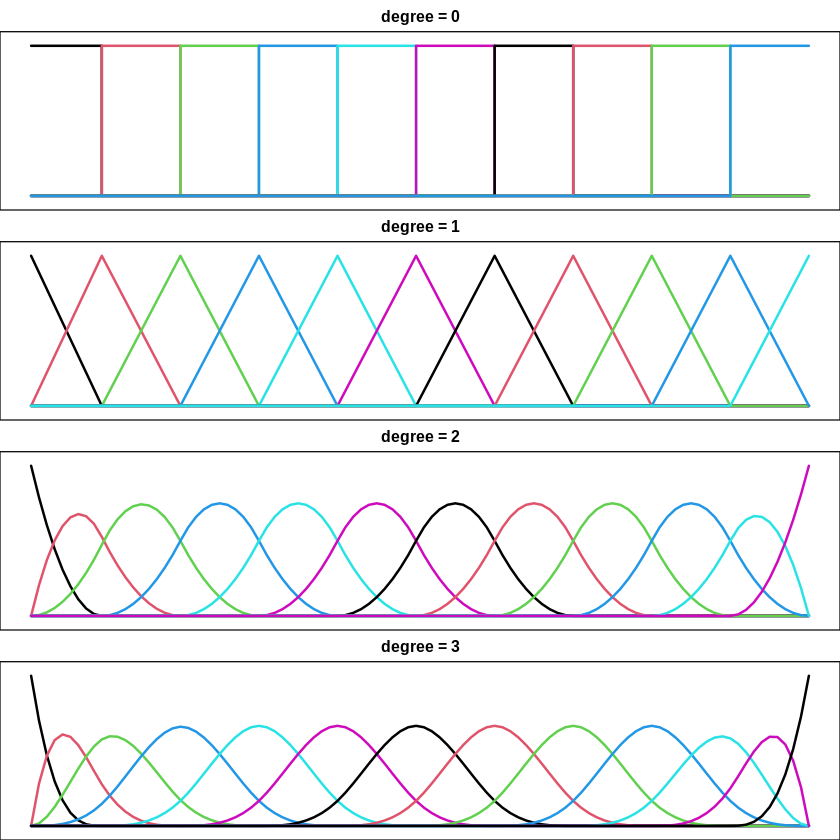

In [3]:
    #install.packages('splines2')
    par(mfrow = c(4, 1), mar = c(0, 0, 2, 0))

    for (d in 0:3)
    {
        bs_d = splines2::bSpline(1:100, degree = d, knots = seq(10, 90, 10), intercept = TRUE)
        matplot(1:100, bs_d, type = ifelse(d == 0, "s", "l"), lty = 1, ylab = "spline", 
                xaxt = 'n', yaxt = 'n', ylim = c(-0.05, 1.05), lwd = 2)
        title(paste("degree =", d))
    }

## Natural Cubic Splines

由於我們對多項式的配適會在邊界處較不穩定，natural cubic splines 要求二階和三階微分在邊界處為0( i.e. $min(x)$ and $max(x)$ )，因此，配適好的模型會在兩個邊界之外(i.e $(−\infty, \xi_1]$ and $[\xi_K, \infty)$ )為線性。由於有兩個邊界與兩個限制式，我們因此可以減少四個自由度，而 $K$ 個 knots 的 natural cubic splines 具有 $K$ 個 basis functions。從先前提到的 truncated power series basis 出發，可得：( 課本式 5.4 和 式 5.5 )

$$N_1(X)=1,\ N_2(X)=X,\ N_{k+2}(X)= d_k(X)-d_{K-1}(X)$$

其中，

$$d_k(X) = \frac{(X-\xi_k)^3_+ - (X-\xi_K)^3_+ }{\xi_K-\xi_k}$$

我們可以證明如下：
 

---

### Proof of  (5.4) and (5.5).  (from Ex. 5.4)

**Consider the truncated power series representation for cubic splines with K interior knots. Let**

$$f(X) = \sum_{j=0}^3\beta_j X^j + \sum_{k=1}^K \theta_k(X-\theta_k)^3_+$$

**Prove that the natural boundary conditions for natural cubic splines (Section 5.2.1) imply the following linear constraints on the coefficients:**

$$\begin{matrix}
\beta_2=0, &  \sum_{k=1}^K \theta_k =0  \\ 
\beta_3=0, & \sum_{k=1}^K \xi_k\theta_k =0
\end{matrix}$$

**Hence derive the basis (5.4) and (5.5).**

我們先看到最左側的區域 $(-\infty,\xi_1)$ ：

$$\begin{aligned}
f(x) &= \sum_{j=0}^3 \beta_j x^j = \beta_0 + \beta_1 x +\beta_2 x^2+\beta_3 x^3\\
f'(x) &= \beta_1 + 2 \beta_2 x + 3\beta_3x^3\\
f''(x)&=2\beta_2+6\beta_3x
\end{aligned}$$

而根據 natural cubic splines 對邊界條件的定義，可得： $f''(x)=0$ 且要對 $\forall x \in (-\infty,\xi_1)$ 都成立，因此 $\beta_2=\beta_3=0$ 。

而我們再看到另外一邊的右邊界 $(\xi_k,\infty)$ ：

$$\begin{aligned}
f(x) &= \sum_{j=0}^3\beta_j x^j + \sum_{k=1}^K \theta_k(x-\xi_k)^3 \\
&=\beta_0 + \beta_1 + \sum_{k=1}^K \theta_k(x^3-\xi_k^3-3x^2\xi_k+3x\xi_k^2)\\
f'(x) &= \beta_1 + 3  \sum_{k=1}^K \theta_k(x-\xi_k)^2 \\
f''(x) &= 6  \sum_{k=1}^K \theta_k(x-\xi_k)
\end{aligned}$$

與先前討論的結果一樣，我們在此引入 natural cubic splines 對二階導數以及線性的限制，可得：

$$\begin{aligned}
 \sum_{k=1}^K \theta_k\xi_k&=0 \\
 \sum_{k=1}^K \theta_k&=0 
\end{aligned}$$

至此，我們已推導出對係數的一些限制。

我們改寫上述關係如下：

$$\left\{\begin{matrix}
\theta_{K-1}+ \theta_K = - \sum_{k=1}^{K-2}\theta_k \\ 
\xi_{K-1}\theta_{K-1}+\xi_{K}\theta_{K} = - \sum_{k=1}^{K-2} \theta_k \xi_k
\end{matrix}\right.$$

經過整理，可得

$$\begin{aligned}
\theta_{K-1} &= \frac{\sum_{k=1}^{K-2}\theta_k(\xi_k-\xi_K)}{\xi_K-\xi_{K-1}}\\
\theta_{K} &= \frac{\sum_{k=1}^{K-2}\theta_k(\xi_{K-1}-\xi_k)}{\xi_K-\xi_{K-1}}
\end{aligned}$$

我們將上面的關係式代入 $f(X)$ ：


$$\begin{aligned}
f(x) &= \beta_0 + \beta_1x + \sum_{k=1}^K \theta_k(x-\xi_k)^3_+ \\
&= \beta_0 + \beta_1x + \sum_{k=1}^{K-2} \theta_k(x-\xi_k)^3_+ + \frac{\sum_{k=1}^{K-2}\theta_k(\xi_k-\xi_K)}{\xi_K-\xi_{K-1}}(x-\xi_{K-1})^3_+ + \frac{\sum_{k=1}^{K-2}\theta_k(\xi_{K-1}-\xi_k)}{\xi_K-\xi_{K-1}} (x-\xi_K)^3_+\\
&= \beta_0 + \beta_1x + \sum_{k=1}^{K-2}\theta_k [(\xi_K-\xi_k)\frac{(x-\xi_k)^3_+ - (x-\xi_K)^3_+ }{\xi_K-\xi_k}-(\xi_K-\xi_k)\frac{(x-\xi_{K-1})^3_+ - (x-\xi_K)^3_+ }{\xi_K-\xi_{K-1}}]\\
&= \beta_0 + \beta_1x +  \sum_{k=1}^{K-2}\theta_k (\xi_K-\xi_k) + [d_k(x)-d_{K-1}(x)]\\
&= \beta_0 N_1(x) + \beta_1 N_2(x) +  \sum_{k=1}^{K-2}\theta_k(\xi_K-\xi_k)N_{k+2}(x)
\end{aligned}$$


此即課本中所說的  natural cubic splines basis 。

---

### Example: South Africa Heart Disease




Call: gam(formula = chd ~ ns(sbp, df = 4) + ns(tobacco, df = 4) + ns(ldl, 
    df = 4) + famhist + ns(obesity, df = 4) + ns(alcohol, df = 4) + 
    ns(age, df = 4), family = binomial, data = SAheart)
Deviance Residuals:
    Min      1Q  Median      3Q     Max 
-1.7245 -0.8265 -0.3884  0.8870  2.9589 

(Dispersion Parameter for binomial family taken to be 1)

    Null Deviance: 596.1084 on 461 degrees of freedom
Residual Deviance: 457.6318 on 436 degrees of freedom
AIC: 509.6318 

Number of Local Scoring Iterations: 6 

Anova for Parametric Effects
                     Df Sum Sq Mean Sq F value    Pr(>F)    
ns(sbp, df = 4)       4   6.31  1.5783  1.4242  0.224956    
ns(tobacco, df = 4)   4  18.09  4.5218  4.0802  0.002941 ** 
ns(ldl, df = 4)       4  12.05  3.0137  2.7194  0.029290 *  
famhist               1  19.70 19.7029 17.7788 3.019e-05 ***
ns(obesity, df = 4)   4   3.66  0.9161  0.8266  0.508701    
ns(alcohol, df = 4)   4   1.28  0.3200  0.2887  0.885278    
ns(age, df = 4)   

Warning message in gplot.default(x = c("Present", "Absent", "Present", "Present", :
“The "x" component of "partial for famhist" has class "character"; no gplot() methods available”


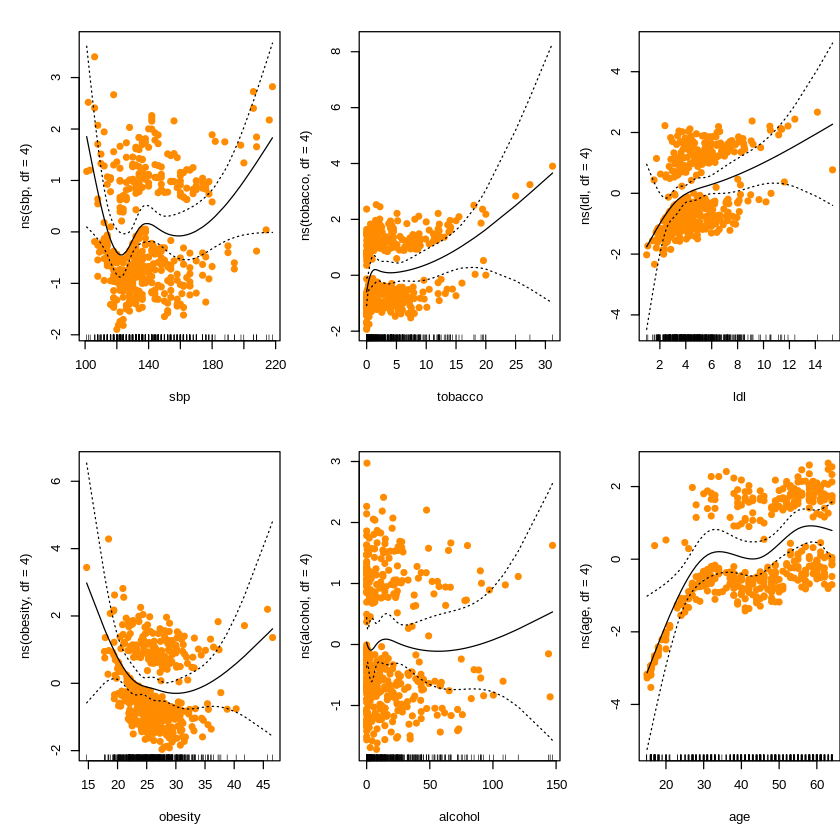

In [ ]:
library(gam)
library(splines)

SAheart <- read.table('/SAheart.data', fileEncoding = "UTF-8", sep = ",",header = T)


m <- gam(chd ~ ns(sbp,df=4) + ns(tobacco,df=4) + 
          ns(ldl,df=4) + famhist + ns(obesity,df=4) + 
          ns(alcohol,df=4) + ns(age,df=4), data=SAheart, family=binomial)

summary(m)

par(mfrow = c(2, 3), mar = c(5, 5, 2, 0))
plot(m, se = TRUE, residuals = TRUE, pch = 19, col = "darkorange")


### Example: Phoneme(音素) Recognition